In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from models.modelsFDH import FDH
import eat
import graphviz
from utils.is_efficient import is_efficient


In [2]:
import plotly.graph_objects as go
import string

In [3]:
X = np.array([[1, 4], [2, 2], [3, 1], [2, 6], [3, 4], [4, 3], [5, 1], [4, 8], [5, 5], [6, 4], [7, 2]])
y = np.array([2, 1, 3, 5, 1, 2, 1, 10, 6, 4, 7])


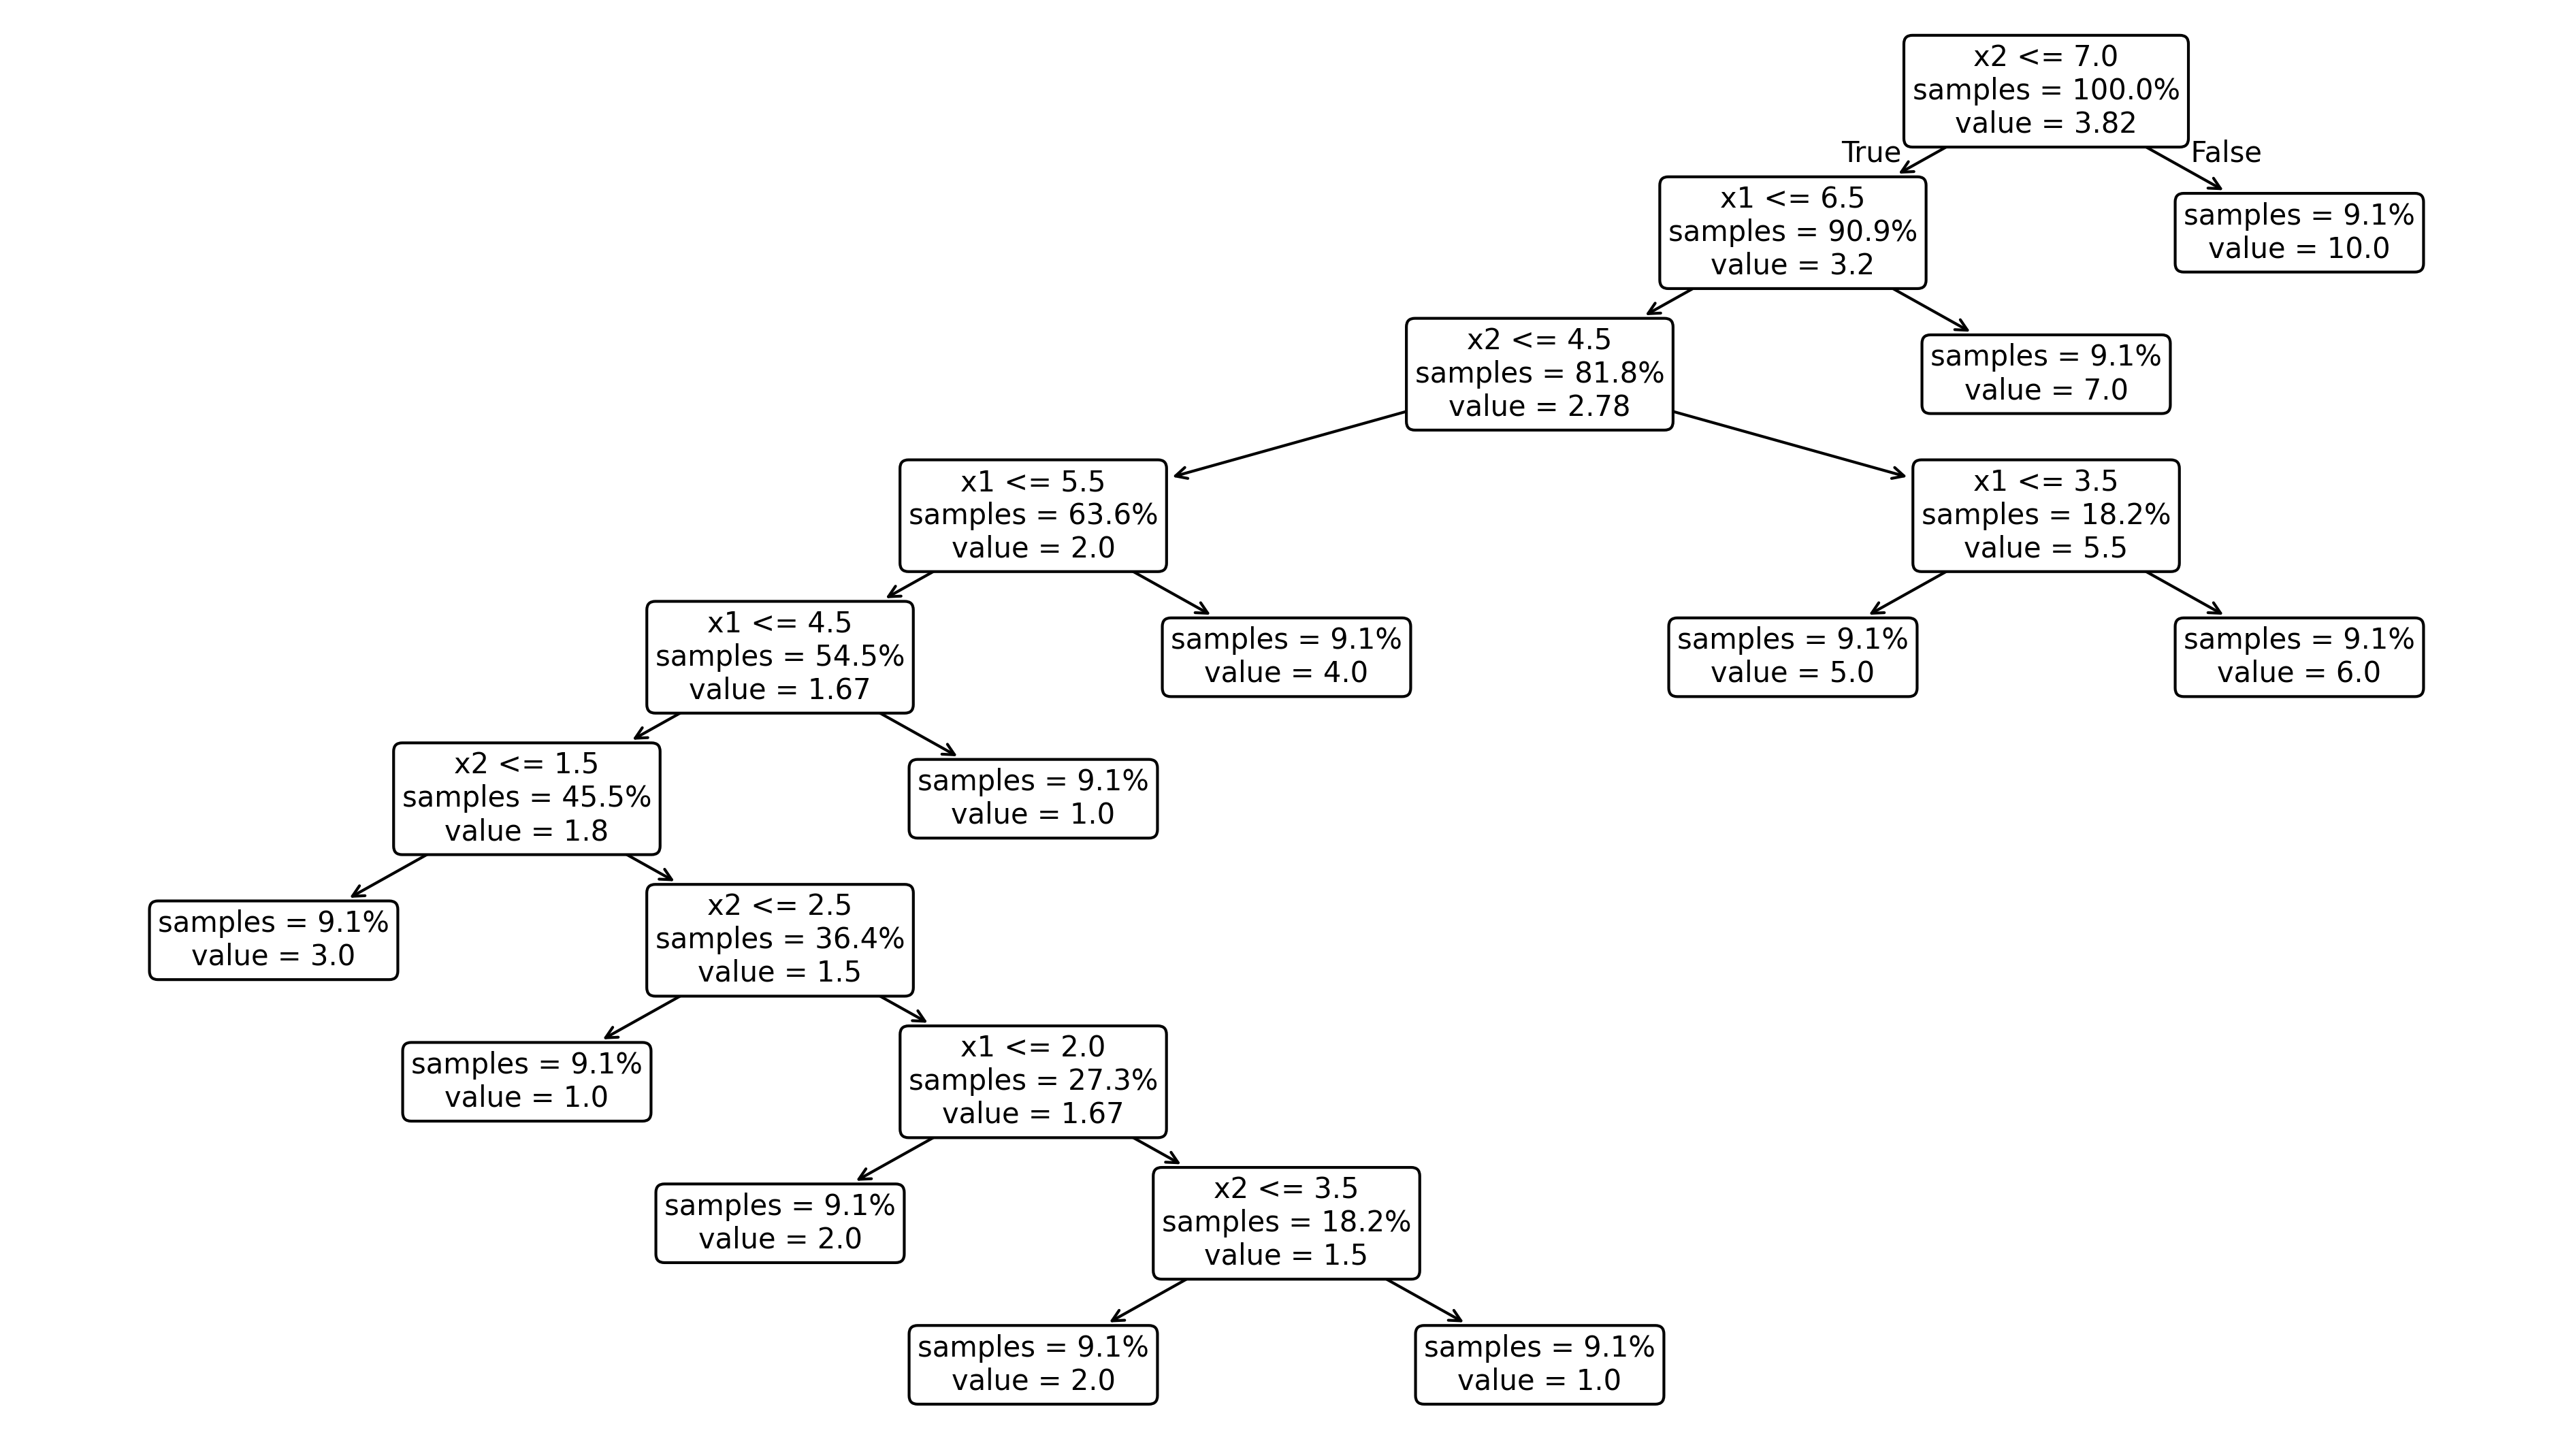

In [4]:
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

plt.figure(figsize=(16, 9), dpi=300)

plot_tree(regressor, 
          feature_names=["x1", "x2"], 
          fontsize=10,         
          impurity=False,     
          rounded=True,       
          precision=2,        
          proportion=True,    
          label='all'
         )

plt.show()

In [5]:
# x1_range = np.linspace(max(0, X[:, 0].min() - 2), X[:, 0].max() + 2, 100)
# x2_range = np.linspace(max(0, X[:, 1].min() - 2), X[:, 1].max() + 2, 100)

# x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
# grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T
# y_grid = regressor.predict(grid_points).reshape(x1_grid.shape)

# fig_2d = go.Figure()

# fig_2d.add_trace(
#     go.Contour(
#         z=y_grid,
#         x=x1_range,
#         y=x2_range,
#         colorscale="Spectral",
#         contours=dict(start=y_grid.min(), end=y_grid.max(), size=0.2),
#         colorbar=dict(title="Predicted Value"),
#     )
# )

# fig_2d.add_trace(
#     go.Scatter(
#         x=X[:, 0],
#         y=X[:, 1],
#         mode="markers",
#         marker=dict(size=8, color=y, colorscale="Spectral", line=dict(width=1, color="black")),
#         name="Data Points",
#     )
# )

# fig_2d.update_layout(
#     title="CART Decision Boundary and Predicted Values (2D)",
#     xaxis_title="x1",
#     yaxis_title="x2",
#     template="plotly_white",
#     showlegend=False,
# )

# fig_2d.show()


In [6]:
import matplotlib.patheffects as PathEffects

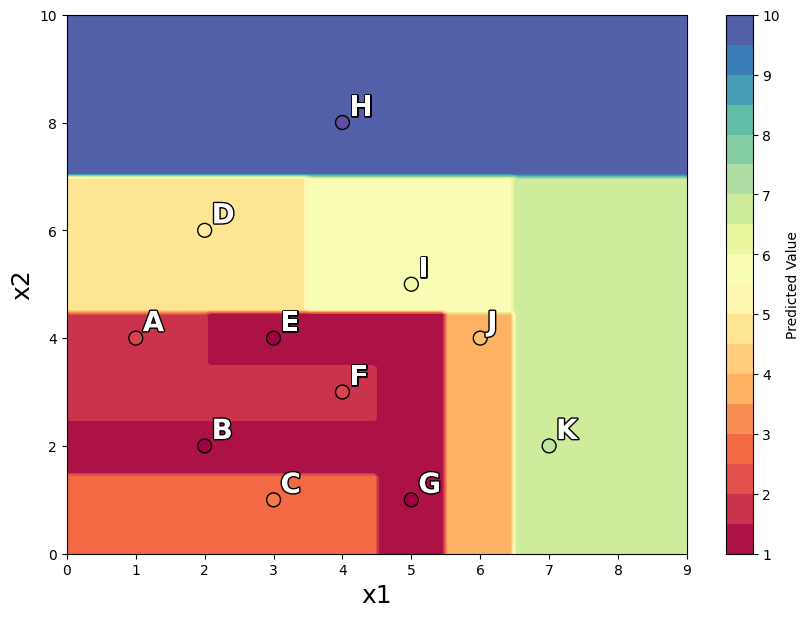

In [7]:
x1_range = np.linspace(max(0, X[:, 0].min() - 2), X[:, 0].max() + 2, 100)
x2_range = np.linspace(max(0, X[:, 1].min() - 2), X[:, 1].max() + 2, 100)

x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

y_grid = regressor.predict(grid_points)
y_grid = y_grid.reshape(x1_grid.shape)

plt.figure(figsize=(10, 7))

contour = plt.contourf(x1_grid, x2_grid, y_grid, cmap='Spectral', levels=20, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolor='k', s=100, marker='o')

labels = list(string.ascii_uppercase)
for i, (x_coord, y_coord) in enumerate(X):
    txt = plt.annotate(labels[i], (x_coord, y_coord), textcoords="offset points",
                       xytext=(5, 5), ha='left', fontsize=20, color='white', fontweight='bold')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])

plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
# plt.title("CART Decision Boundary and Predicted Values")
plt.colorbar(contour, label='Predicted Value')
# plt.legend()
plt.show()

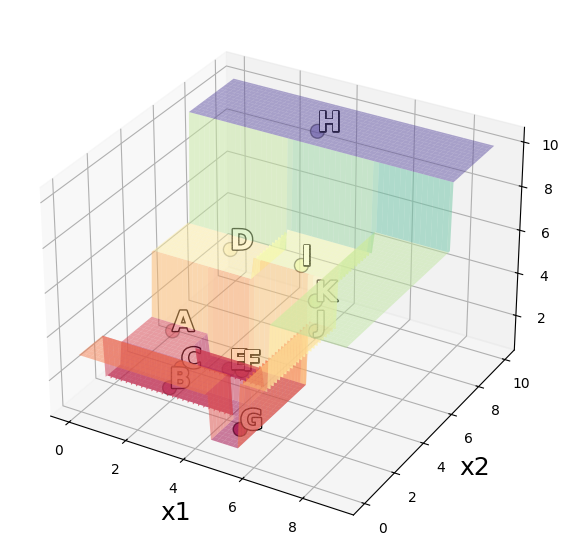

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import string
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d import Axes3D

# Assuming X and y are your data arrays
# X = np.array([...])
# y = np.array([...])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x1_grid, x2_grid, y_grid, cmap='Spectral', alpha=0.5)

# Scatter plot for data points
scatter = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Data Points')

# Create labels
labels = list(string.ascii_uppercase)
for i, (x_coord, y_coord, z_coord) in enumerate(zip(X[:, 0], X[:, 1], y)):
    text = ax.text(x_coord, y_coord, z_coord, labels[i], color='white', fontsize=20, fontweight='bold')
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])

ax.set_xlabel('x1', fontsize=18)
ax.set_ylabel('x2', fontsize=18)
ax.set_zlabel('y', fontsize=18)
# ax.set_title("3D Plot with CART Decision Frontier and Data Points")

# Add legend (optional)
# ax.legend()

plt.show()


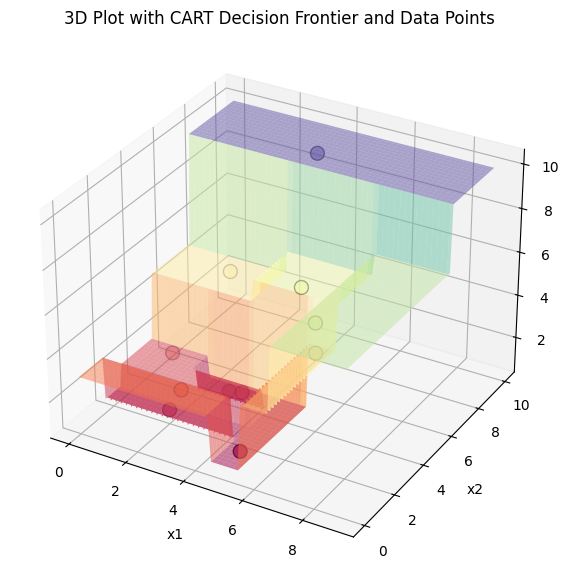

In [9]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1_grid, x2_grid, y_grid, cmap='Spectral', alpha=0.5)

ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Data Points')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title("3D Plot with CART Decision Frontier and Data Points")

# Add legend
# ax.legend()

plt.show()


In [10]:
# fig_3d = go.Figure()

# fig_3d.add_trace(
#     go.Surface(
#         z=y_grid,
#         x=x1_range,
#         y=x2_range,
#         colorscale="Spectral",
#         opacity=0.8,
#         showscale=True,
#         colorbar=dict(title="Predicted Value"),
#     )
# )

# fig_3d.add_trace(
#     go.Scatter3d(
#         x=X[:, 0],
#         y=X[:, 1],
#         z=y,
#         mode="markers",
#         marker=dict(size=5, color=y, colorscale="Spectral", line=dict(width=1, color="black")),
#         name="Data Points",
#     )
# )

# fig_3d.update_layout(
#     title="3D Plot with CART Decision Frontier",
#     scene=dict(
#         xaxis_title="x1",
#         yaxis_title="x2",
#         zaxis_title="y",
#     ),
#     template="plotly_white",
#     showlegend=False,
# )

# # Display the plots
# fig_3d.show()

In [11]:
X = np.array([[1, 4], [2, 2], [3, 1], [2, 6], [3, 4], [4, 3], [5, 1], [4, 8], [5, 5], [6, 4], [7, 2]])
y = np.array([2, 1, 3, 5, 1, 2, 1, 10, 6, 4, 7])
y = y.reshape((11, 1))
fdh = FDH(X, y)

In [12]:
X.shape, y.shape

((11, 2), (11, 1))

In [13]:
fdh.fdh_output_vrs()

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2579375
Academic license 2579375 - for non-commercial use only - registered to ma___@iitd.ac.in


,DMU,efficiency,is_efficient
0,0,1.0,True
1,1,1.0,True
2,2,1.0,True
3,3,1.0,True
4,4,3.0,False
5,5,1.5,False
6,6,3.0,False
7,7,1.0,True
8,8,1.0,True
9,9,1.0,True


In [36]:
# FDH OUTPUT VRS

In [37]:
fdh.predict([23, 55], 'fdh_output_vrs')

10

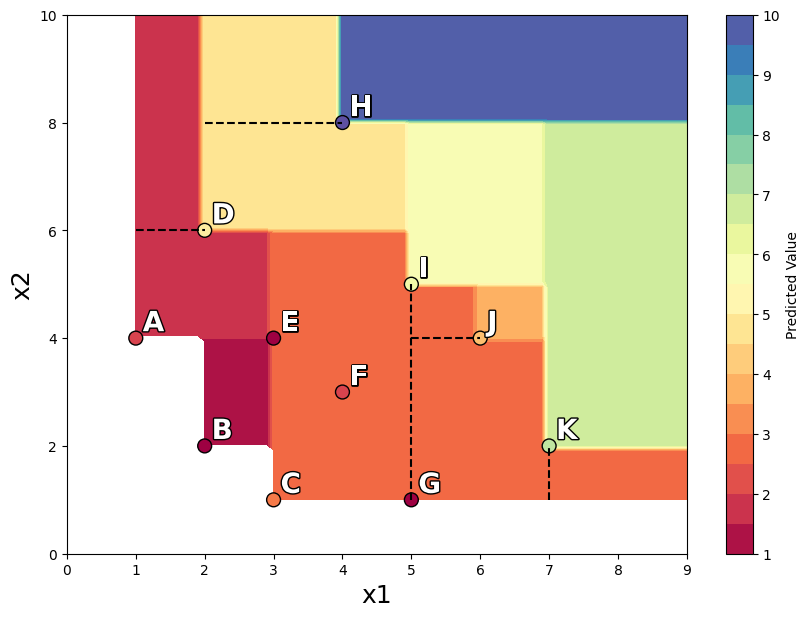

In [15]:
x1_min, x1_max = max(X[:, 0].min()-2, 0), X[:, 0].max()+2
x2_min, x2_max = max(X[:, 1].min()-2, 0), X[:, 1].max()+2

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

y_grid = np.array([fdh.predict([x1, x2], 'fdh_output_vrs') for x1, x2 in grid_points])

y_grid = np.ma.masked_where(y_grid == 0, y_grid)

y_grid = y_grid.reshape(x1_grid.shape)

plt.figure(figsize=(10, 7))

contour = plt.contourf(x1_grid, x2_grid, y_grid, cmap='Spectral', levels=20, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Original Data')

labels = list(string.ascii_uppercase)
for i, (x_coord, y_coord) in enumerate(X):
    txt = plt.annotate(labels[i], (x_coord, y_coord), textcoords="offset points",
                       xytext=(5, 5), ha='left', fontsize=20, color='white', fontweight='bold')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])


plt.plot([1, 2], [6, 6], color='black', linestyle='--')
# plt.plot([2, 2], [4, 6], color='red', linestyle='--')
plt.plot([2, 4], [8, 8], color='black', linestyle='--')
plt.plot([5,5], [1, 5], color='black', linestyle='--')
plt.plot([5, 6], [4, 4], color='black', linestyle='--')
plt.plot([7, 7], [1, 2], color='black', linestyle='--')
# plt.plot([2, 6], [1, 6], color='red', linestyle='--')
# plt.plot([2, 6], [1, 6], color='red', linestyle='--')

plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
# plt.title("CART Decision Boundary and Predicted Values")
plt.colorbar(contour, label='Predicted Value')
# plt.legend()

plt.show()

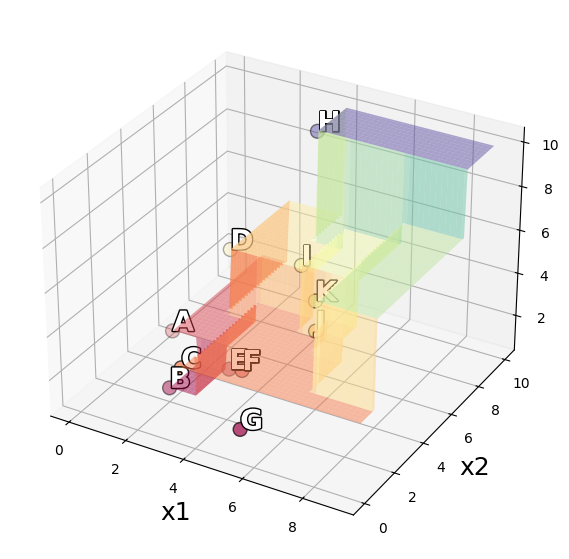

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import string
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d import Axes3D

# Assuming X and y are your data arrays
# X = np.array([...])
# y = np.array([...])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Flatten y to ensure it's a 1D array
y_flat = y.flatten()

# Plot the scatter points in 3D
scatter = ax.scatter(
    X[:, 0], X[:, 1], y_flat, 
    c=y_flat, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Data Points'
)

# Plot the 3D surface
ax.plot_surface(x1_grid, x2_grid, y_grid, cmap='Spectral', alpha=0.5)

# Create labels for each point
labels = list(string.ascii_uppercase)
for i, (x_coord, y_coord, z_coord) in enumerate(zip(X[:, 0], X[:, 1], y_flat)):
    text = ax.text(x_coord, y_coord, z_coord, labels[i], color='white', fontsize=20, fontweight='bold')
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])

# Set labels and title
ax.set_xlabel('x1', fontsize=18)
ax.set_ylabel('x2', fontsize=18)
ax.set_zlabel('y', fontsize=18)
# ax.set_title("3D Plot with CART Decision Frontier and Data Points")

# Add legend (optional)
# ax.legend()

plt.show()


In [17]:
# import numpy as np
# import plotly.graph_objects as go

# x1_min, x1_max = max(X[:, 0].min() - 2, 0), X[:, 0].max() + 2
# x2_min, x2_max = max(X[:, 1].min() - 2, 0), X[:, 1].max() + 2

# x1_range = np.linspace(x1_min, x1_max, 100)
# x2_range = np.linspace(x2_min, x2_max, 100)
# x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# # Predict the output grid points
# grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T
# y_grid = np.array([fdh.predict([x1, x2], 'fdh_output_vrs') for x1, x2 in grid_points])
# y_grid = np.ma.masked_where(y_grid == 0, y_grid).reshape(x1_grid.shape)

# # Flatten the data for plotting
# y_flat = y.flatten()

# # 2D Interactive Plot
# fig_2d = go.Figure()

# # Add contour plot for the decision frontier
# fig_2d.add_trace(go.Contour(
#     z=y_grid,
#     x=x1_range,
#     y=x2_range,
#     colorscale='Spectral',
#     colorbar=dict(title='Predicted Value'),
#     contours=dict(showlabels=True),
#     opacity=0.8
# ))

# # Add scatter points for the data
# fig_2d.add_trace(go.Scatter(
#     x=X[:, 0],
#     y=X[:, 1],
#     mode='markers',
#     marker=dict(size=10, color=y_flat, colorscale='Spectral', line=dict(width=1, color='black')),
#     name='Data Points'
# ))

# fig_2d.update_layout(
#     title="Interactive 2D FDH Decision Boundary",
#     xaxis_title="x1",
#     yaxis_title="x2",
#     template="plotly_white"
# )

# # 3D Interactive Plot
# fig_3d = go.Figure()

# # Add 3D surface for the decision frontier
# fig_3d.add_trace(go.Surface(
#     z=y_grid,
#     x=x1_grid,
#     y=x2_grid,
#     colorscale='Spectral',
#     opacity=0.8,
#     name='Decision Frontier'
# ))

# # Add scatter points in 3D
# fig_3d.add_trace(go.Scatter3d(
#     x=X[:, 0],
#     y=X[:, 1],
#     z=y_flat,
#     mode='markers',
#     marker=dict(size=5, color=y_flat, colorscale='Spectral', line=dict(width=1, color='black')),
#     name='Data Points'
# ))

# fig_3d.update_layout(
#     title="Interactive 3D FDH Decision Frontier",
#     scene=dict(
#         xaxis_title="x1",
#         yaxis_title="x2",
#         zaxis_title="y"
#     ),
#     template="plotly_white"
# )

# # Show the plots
# fig_2d.show()
# fig_3d.show()


In [18]:
X = np.array([[1, 4], [2, 2], [3, 1], [2, 6], [3, 4], [4, 3], [5, 1], [4, 8], [5, 5], [6, 4], [7, 2]])
y = np.array([2, 1, 3, 5, 1, 2, 1, 10, 6, 4, 7])

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

In [19]:

df

,x1,x2,y
0,1,4,2
1,2,2,1
2,3,1,3
3,2,6,5
4,3,4,1
5,4,3,2
6,5,1,1
7,4,8,10
8,5,5,6
9,6,4,4


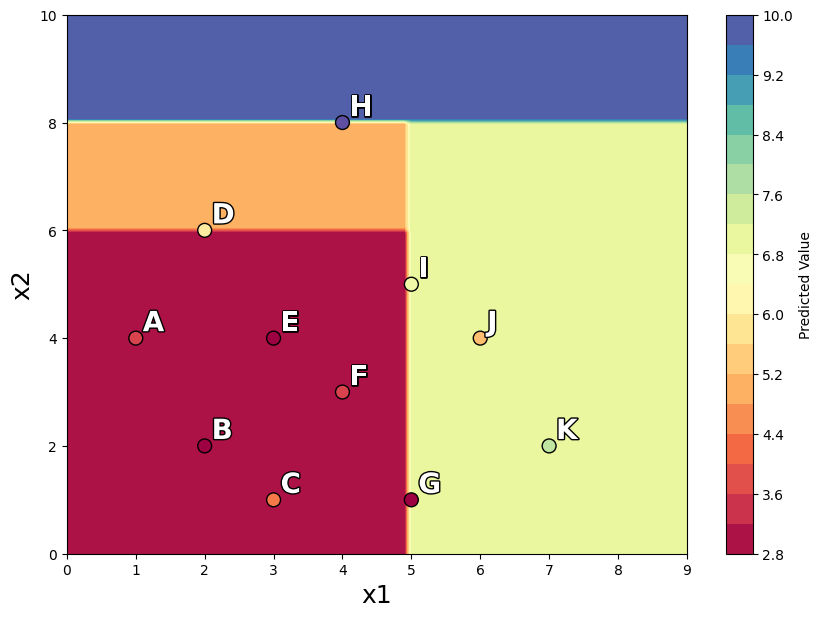

In [20]:
model = eat.EAT(df, ["x1", "x2"], ["y"], 1, 5)
model.fit()
x1_min, x1_max = max(X[:, 0].min()-2, 0), X[:, 0].max()+2
x2_min, x2_max = max(X[:, 1].min()-2, 0), X[:, 1].max()+2

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

y_grid = np.array([model.predict([x1, x2], ['x1', 'x2']) for x1, x2 in grid_points])

y_grid = np.ma.masked_where(y_grid == 0, y_grid)

y_grid = y_grid.reshape(x1_grid.shape)

plt.figure(figsize=(10, 7))

contour = plt.contourf(x1_grid, x2_grid, y_grid, cmap='Spectral', levels=20, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Original Data')
labels = list(string.ascii_uppercase)
for i, (x_coord, y_coord) in enumerate(X):
    txt = plt.annotate(labels[i], (x_coord, y_coord), textcoords="offset points",
                       xytext=(5, 5), ha='left', fontsize=20, color='white', fontweight='bold')
    txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='black')])

plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
# plt.title("EAT Decision Boundary and Predicted Values")
plt.colorbar(contour, label='Predicted Value')
# plt.legend()

plt.show()

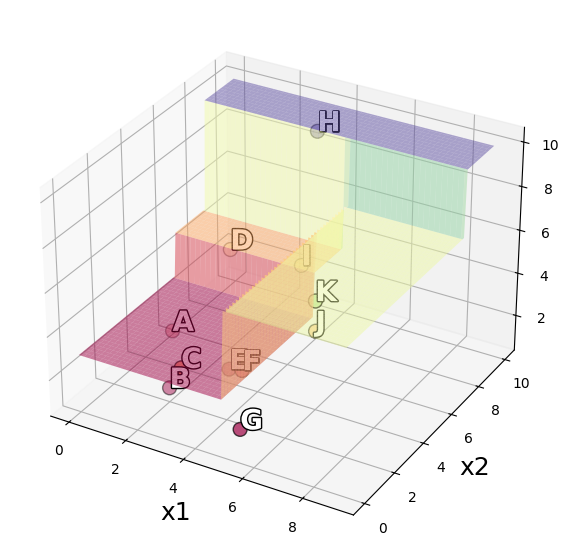

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import string
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d import Axes3D

# Assuming X and y are your data arrays
# X = np.array([...])
# y = np.array([...])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Flatten y to ensure it's a 1D array
y_flat = y.flatten()

# Plot the scatter points in 3D
scatter = ax.scatter(
    X[:, 0], X[:, 1], y_flat, 
    c=y_flat, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Data Points'
)

# Plot the 3D surface
ax.plot_surface(x1_grid, x2_grid, y_grid, cmap='Spectral', alpha=0.5)

# Create labels
labels = list(string.ascii_uppercase)
for i, (x_coord, y_coord, z_coord) in enumerate(zip(X[:, 0], X[:, 1], y_flat)):
    text = ax.text(x_coord, y_coord, z_coord, labels[i], color='white', fontsize=20, fontweight='bold')
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()
    ])

# Set labels and title
ax.set_xlabel('x1', fontsize=18)
ax.set_ylabel('x2', fontsize=18)
ax.set_zlabel('y')
# ax.set_title("3D Plot with EAT Decision Frontier")

# Add legend
# ax.legend()

plt.show()


In [22]:
# x1_min, x1_max = max(X[:, 0].min() - 2, 0), X[:, 0].max() + 2
# x2_min, x2_max = max(X[:, 1].min() - 2, 0), X[:, 1].max() + 2

# x1_range = np.linspace(x1_min, x1_max, 100)
# x2_range = np.linspace(x2_min, x2_max, 100)
# x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# # Predict the output grid points
# grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T
# y_grid = np.array([model.predict([x1, x2], ['x1', 'x2']) for x1, x2 in grid_points])
# y_grid = np.ma.masked_where(y_grid == 0, y_grid).reshape(x1_grid.shape)

# # Flatten the data for plotting
# y_flat = y.flatten()

# # 2D Interactive Plot
# fig_2d = go.Figure()

# # Add contour plot for the decision boundary
# fig_2d.add_trace(go.Contour(
#     z=y_grid,
#     x=x1_range,
#     y=x2_range,
#     colorscale='Spectral',
#     colorbar=dict(title='Predicted Value'),
#     contours=dict(showlabels=True),
#     opacity=0.8
# ))

# # Add scatter points for the data
# fig_2d.add_trace(go.Scatter(
#     x=X[:, 0],
#     y=X[:, 1],
#     mode='markers',
#     marker=dict(size=10, color=y_flat, colorscale='Spectral', line=dict(width=1, color='black')),
#     name='Data Points'
# ))

# fig_2d.update_layout(
#     title="Interactive 2D EAT Decision Boundary",
#     xaxis_title="x1",
#     yaxis_title="x2",
#     template="plotly_white"
# )

# # 3D Interactive Plot
# fig_3d = go.Figure()

# # Add 3D surface for the decision boundary
# fig_3d.add_trace(go.Surface(
#     z=y_grid,
#     x=x1_grid,
#     y=x2_grid,
#     colorscale='Spectral',
#     opacity=0.8,
#     name='Decision Frontier'
# ))

# # Add scatter points in 3D
# fig_3d.add_trace(go.Scatter3d(
#     x=X[:, 0],
#     y=X[:, 1],
#     z=y_flat,
#     mode='markers',
#     marker=dict(size=5, color=y_flat, colorscale='Spectral', line=dict(width=1, color='black')),
#     name='Data Points'
# ))

# fig_3d.update_layout(
#     title="Interactive 3D EAT Decision Frontier",
#     scene=dict(
#         xaxis_title="x1",
#         yaxis_title="x2",
#         zaxis_title="y"
#     ),
#     template="plotly_white"
# )

# # Show the plots
# fig_2d.show()
# fig_3d.show()


In [23]:
import numpy as np
df2 =pd.DataFrame()
df2['efficiency'] =  np.array([1.500, 3.000, 1.000, 1.000, 3.000, 1.500, 7.000, 1.000, 1.167, 1.750, 1.000])

In [24]:
df2

,efficiency
0,1.500
1,3.000
2,1.000
3,1.000
4,3.000
5,1.500
6,7.000
7,1.000
8,1.167
9,1.750


In [25]:
df2 = is_efficient(df2, 'fdh_input_crs')

In [26]:
df2

,efficiency,is_efficient
0,1.500,False
1,3.000,False
2,1.000,True
3,1.000,True
4,3.000,False
5,1.500,False
6,7.000,False
7,1.000,True
8,1.167,False
9,1.750,False


In [27]:
df3 = pd.concat([df, df2], axis=1)

In [28]:
df3

,x1,x2,y,efficiency,is_efficient
0,1,4,2,1.500,False
1,2,2,1,3.000,False
2,3,1,3,1.000,True
3,2,6,5,1.000,True
4,3,4,1,3.000,False
5,4,3,2,1.500,False
6,5,1,1,7.000,False
7,4,8,10,1.000,True
8,5,5,6,1.167,False
9,6,4,4,1.750,False


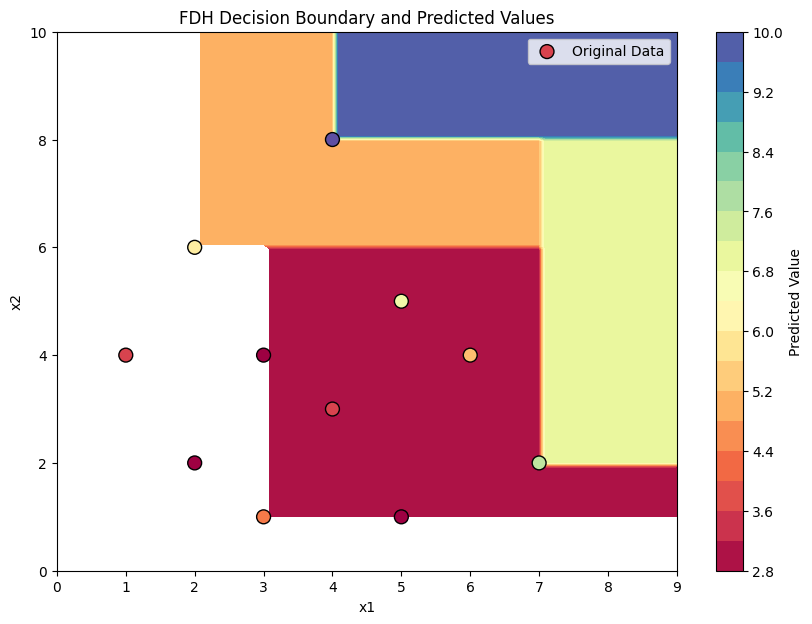

In [29]:
x1_min, x1_max = max(X[:, 0].min() - 2, 0), X[:, 0].max() + 2
x2_min, x2_max = max(X[:, 1].min() - 2, 0), X[:, 1].max() + 2

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

y_grid = np.zeros(grid_points.shape[0])

for idx, point in enumerate(grid_points):
    valid_dmus = []

    for i in range(len(df3)):  
        if df3.loc[i, 'is_efficient'] and np.all(X[i] < point):
            valid_dmus.append(i)

    if valid_dmus:
        y_grid[idx] = max(y[i] for i in valid_dmus)
    else:
        y_grid[idx] = np.nan  

y_grid = np.ma.masked_invalid(y_grid)

y_grid = y_grid.reshape(x1_grid.shape)

plt.figure(figsize=(10, 7))

contour = plt.contourf(x1_grid, x2_grid, y_grid, cmap='Spectral', levels=20, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Original Data')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("FDH Decision Boundary and Predicted Values")
plt.colorbar(contour, label='Predicted Value')
plt.legend()

plt.show()

/var/folders/7w/3vj71g3x61v5rw8zzntby1m00000gn/T/ipykernel_15307/3553968717.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


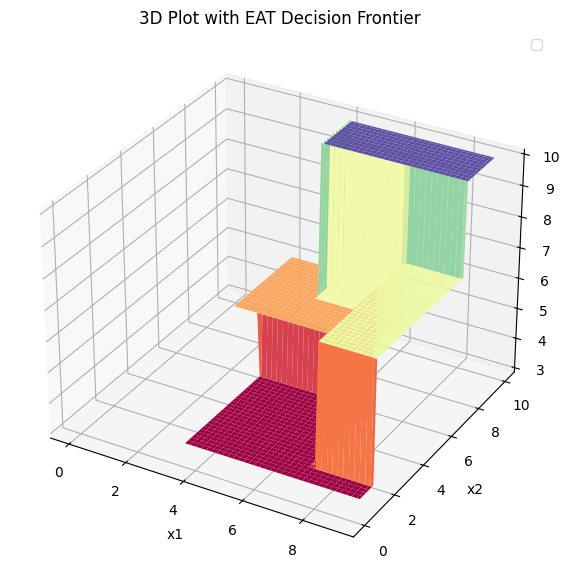

In [30]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1_grid, x2_grid, y_grid, cmap='Spectral', alpha=1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title("3D Plot with EAT Decision Frontier")
ax.legend()

plt.show()

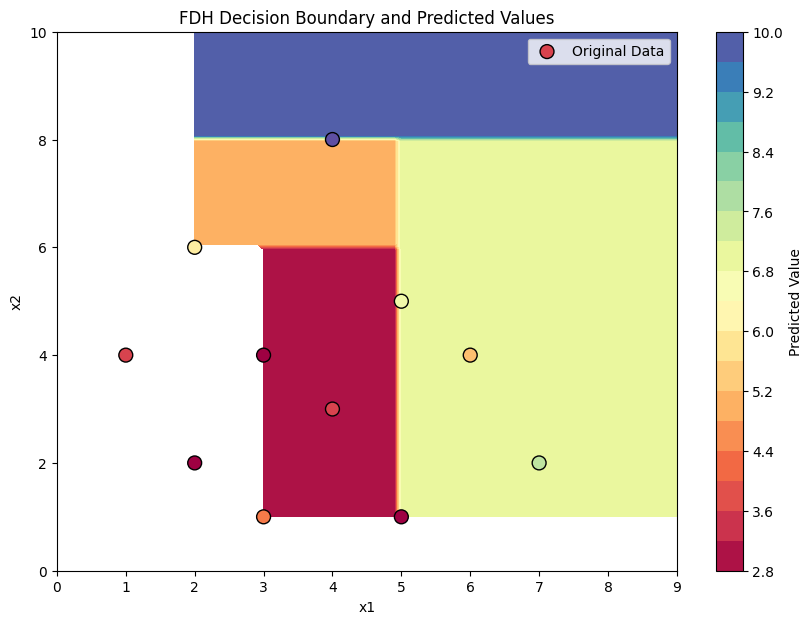

In [31]:
x1_min, x1_max = max(X[:, 0].min() - 2, 0), X[:, 0].max() + 2
x2_min, x2_max = max(X[:, 1].min() - 2, 0), X[:, 1].max() + 2

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

y_grid = np.full(grid_points.shape[0], np.nan)  

for idx, point in enumerate(grid_points):
    valid_dmus = []

    for i in range(len(df2)):  
        if df2.loc[i, 'is_efficient'] and np.all(X[i] <= point):
            valid_dmus.append(i)

    if valid_dmus:
        y_grid[idx] = model.predict([point[0], point[1]], ['x1', 'x2'])[0]

y_grid = np.ma.masked_invalid(y_grid)

y_grid = y_grid.reshape(x1_grid.shape)

plt.figure(figsize=(10, 7))

contour = plt.contourf(x1_grid, x2_grid, y_grid, cmap='Spectral', levels=20, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Original Data')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("FDH Decision Boundary and Predicted Values")
plt.colorbar(contour, label='Predicted Value')
plt.legend()

plt.show()

In [32]:
model.predict([12, 12], ['x1', 'x2'])

[10]

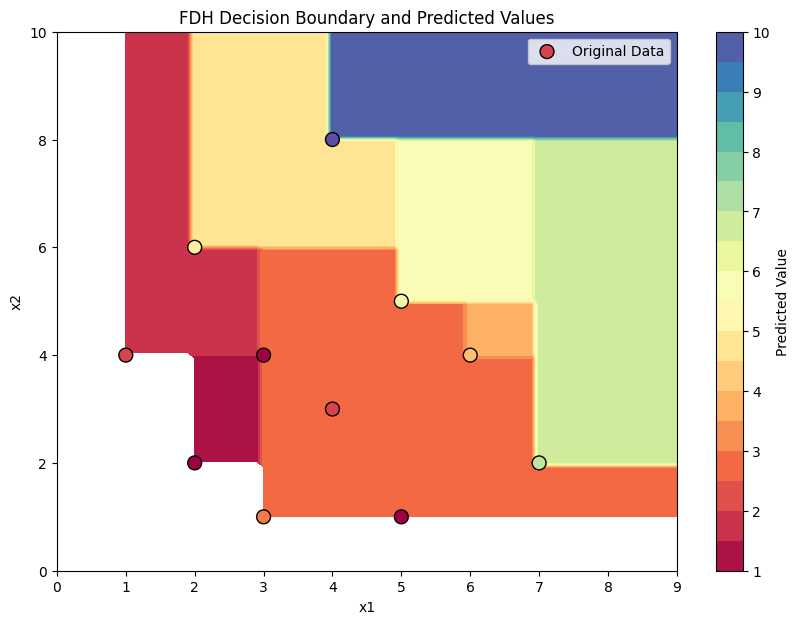

In [33]:
x1_min, x1_max = max(X[:, 0].min() - 2, 0), X[:, 0].max() + 2
x2_min, x2_max = max(X[:, 1].min() - 2, 0), X[:, 1].max() + 2

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

y_grid = np.zeros(grid_points.shape[0])

for idx, point in enumerate(grid_points):
    valid_dmus = []

    for i in range(len(df2)):  
        if np.all(X[i] <= point):
            valid_dmus.append(i)

    if valid_dmus:
        y_grid[idx] = max(y[i] for i in valid_dmus)
    else:
        y_grid[idx] = np.nan  

y_grid = np.ma.masked_invalid(y_grid)

y_grid = y_grid.reshape(x1_grid.shape)

plt.figure(figsize=(10, 7))

contour = plt.contourf(x1_grid, x2_grid, y_grid, cmap='Spectral', levels=20, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Original Data')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("FDH Decision Boundary and Predicted Values")
plt.colorbar(contour, label='Predicted Value')
plt.legend()

plt.show()

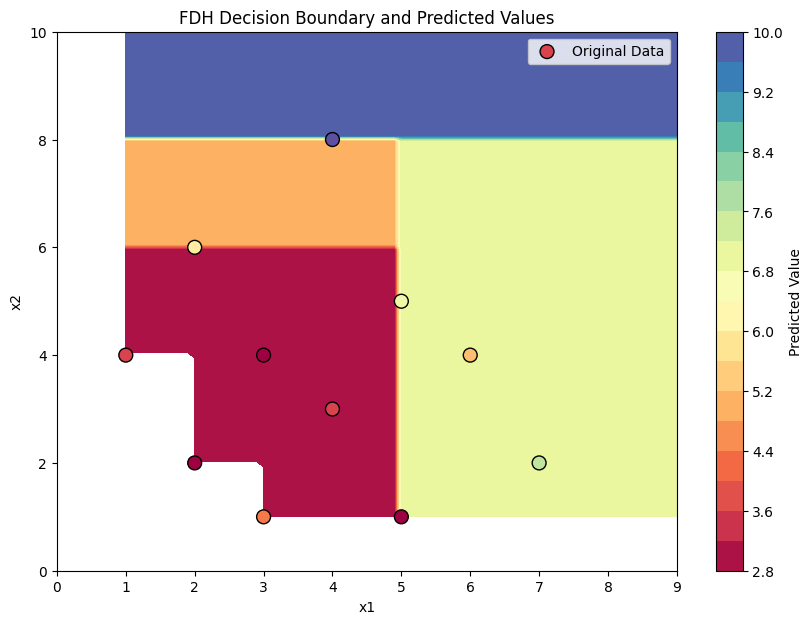

In [34]:
x1_min, x1_max = max(X[:, 0].min() - 2, 0), X[:, 0].max() + 2
x2_min, x2_max = max(X[:, 1].min() - 2, 0), X[:, 1].max() + 2

x1_range = np.linspace(x1_min, x1_max, 100)
x2_range = np.linspace(x2_min, x2_max, 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

grid_points = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

y_grid = np.full(grid_points.shape[0], np.nan)  

for idx, point in enumerate(grid_points):
    valid_dmus = []

    for i in range(len(df2)):  
        if np.all(X[i] <= point):
            valid_dmus.append(i)

    if valid_dmus:
        y_grid[idx] = model.predict([point[0], point[1]], ['x1', 'x2'])[0]

y_grid = np.ma.masked_invalid(y_grid)

y_grid = y_grid.reshape(x1_grid.shape)

plt.figure(figsize=(10, 7))

contour = plt.contourf(x1_grid, x2_grid, y_grid, cmap='Spectral', levels=20, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral', edgecolor='k', s=100, marker='o', label='Original Data')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("FDH Decision Boundary and Predicted Values")
plt.colorbar(contour, label='Predicted Value')
plt.legend()

plt.show()